# Introduction to Data Science - Homework 3
*CS 5963 / MATH 3900, University of Utah, http://datasciencecourse.net/*

Due: Friday, September 23, 11:59pm.

In this homework you will complete an A/B test for a mock company and compute a moving average for air quality data.


## Your Data
Fill out the following information: 

*First Name: Tyler*   
*Last Name: Clive*   
*E-mail: u0389772@utah.edu*   
*UID: u0389772*  


## Part 1: A/B testing

First read the WIRED article on A/B testing [here](http://www.wired.com/2012/04/ff_abtesting/).

Suppose your company is developing a new logo. The art department develops two logos: ‘Logo A’ and ‘Logo B’ shown below. 
![](http://www.wired.com/wiredenterprise/wp-content/gallery/20-05/ff_abtesting_f.jpg)
Your job is to figure out which logo is better. 


You decide to do the following experiment. You use Google ads to buy 2000 advertisements. In $N_A=1000$ of the ads (randomly chosen), you use Logo A and in the other $N_B=1000$, you use Logo B. Then you see which logo attracts more clicks.

It turns out that $n_A=500$ Logo A viewers click on the ad while $n_B=550$ Logo B viewers click on the ad. Obviously Logo B did better in this test, but is the difference *significant* enough to say that Logo B is better? Perhaps, Logo B just got lucky in this test? The goal of this exercise will be to use hypothesis testing to determine the answer.


### Task 1.1 Plot Distributions
As a first step to understanding the data, consider the distributions for the two ads independently. It is known that $n_A/N_A$ is approximately a normal random variable with mean $p_A=n_A/N_A$ and variance $\sigma_A^2 = p_A(1-p_A)/N_A$ and the equivalent statement holds for $n_B/N_B$. Plot the probability density functions for these two variables, considered independently. Interpet the results.   




In [272]:
# imports and setup 
import scipy as sc
from scipy.stats import norm

import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 

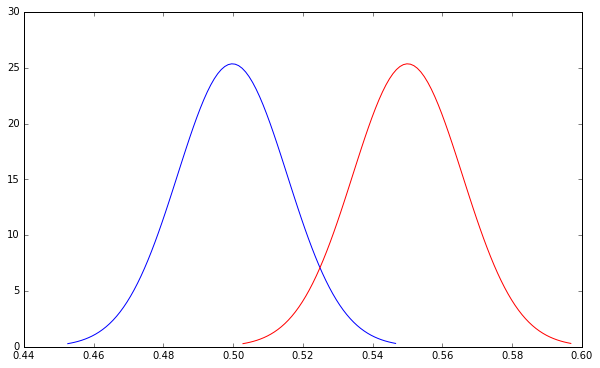

In [273]:
#Standard inputs for distribution of clicks on ad A  

N_A = 1000   #sample size
p_A = 500/1000   #mean likelihood of occurence
variance_A = (p_A*(1-p_A)/N_A)   # variance
sigma_A = sc.sqrt(variance_A)   #standard deviation


# scipy function to create distribution of likely clicks on A

x = sc.arange(p_A-3*sigma_A,p_A+3*sigma_A,0.001);
pdf = norm.pdf(x,loc=p_A, scale=sigma_A)


# standard inputs for distribution of clicks on B

N_B = 1000
p_B = 550/1000
variance_B = (p_B*(1-p_B)/N_B)
sigma_B = sc.sqrt(variance_B)

# scipy function to create distribution of likely clicks on B

y = sc.arange(p_B-3*sigma_B,p_B+3*sigma_B,0.001);
pdf = norm.pdf(y,loc=p_B, scale=sigma_B)


# plot graphs of distributions

plt.plot(x, pdf, linewidth=1, color='b')
plt.plot(y, pdf, linewidth=1, color='r')
plt.show()

**Your interpretation:**

The scipy arange function shows the distribution of the likelihood of each scenario given the mean and standard deviation (square root of variance). There is some overlap between the curves but I would guess the shared area is only about 10% of each curve. The width of each distribution is identical. Given the large sample size of 1000 and sizeable difference between the means, it seems highly unlikely to me that each curve comes from the same distribution.

**Reference Interpretation:** The distributions describing the estimate for the two click-rates overlap somewhat, so it looks feasible but unlikely that the two click rates could come from the same distribution. 

### Task 1.2. Hypothesis Testing

Conduct a hypothesis test to determine whether the proportion of clicks for the two logos was significantly different. Repeating the analysis from Lecture 4. 
1. Report the standardized $z$ value
+ Report the $p$-value for your hypothesis test
+ For what confidence levels would we reject the null hypothesis? 
+ Interpret your results, stating the result of the hypothesis test and exactly how to interpret the $p$-value in this example. 

0.999217298871


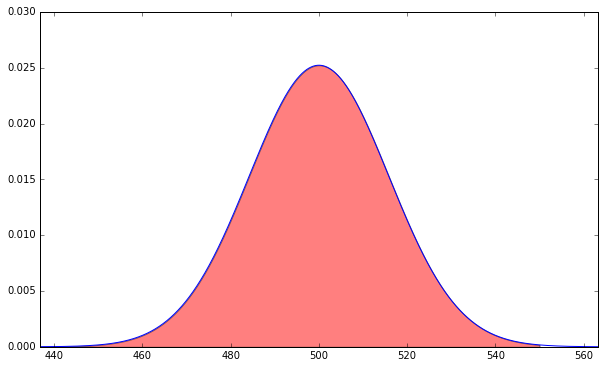

In [274]:
# Your testing / plotting code goes here


n_A = 1000 #sample size
p_A = 0.5
mu_A = n_A*p_A
sigma_A = sc.sqrt(n_A*p_A*(1-p_A))
print(norm.cdf(550, loc=mu_A, scale=sigma_A))


# a plot illustrating the integral 
z = sc.arange(mu_A-4*sigma_A,mu_A+4*sigma_A,0.001);
plt.plot(z, norm.pdf(z, loc=mu_A, scale=sigma_A), linewidth=1, color='b')
z2 = sc.arange(mu_A-4*sigma_A,550,0.001)
plt.fill_between(z2, y1= norm.pdf(z2,loc=mu_A, scale=sigma_A), facecolor='red', alpha=0.5)
plt.xlim([mu_A-4*sigma_A,mu_A+4*sigma_A])
plt.show()

**Your Interpretation:**

Hypothesis testing projects the likelihood of a result occuring based on the the null hypothesis. 

In this graph, the null hypothesis is that an ad is clicked on 500/1000 times. The occurrence of 550 or more clicks is unlikely 99.92173% of the time given the null hypothesis. This seems to demonstrate that the result is extremely unlikely (more than three standard deviations outside of the norm) given the null hypothesis. By convention, if an occurence happens less than 5% of the time, we fail to accept the null hypothesis as we would do in this case.

## Part 2: Moving average for SLC Air Quality Index 

In this problem, we will compute a moving average for the PM2.5 Air Quality Index at Hawthorn Elementary School in Salt Lake City.

Read more about air quality in SLC here: http://slcair.communication.utah.edu/


## Task 2.1. Download data

Go to [this website](https://www.epa.gov/air-data) and download the following daily data: 
1. Pollutant = PM2.5
2. Year = 2015
3. City = Salt Lake City, UT
4. Monitor Site = 490353006 (Hawthorn Elementary School)

## Task 2.2. Import and clean the data 
Use the pandas.read_csv() function to import the data

A word of warning: this data isn't very clean.

1. The dates are not sorted 
2. some dates have multiple values corresponding to two different collection sites (POC = 1,4) 
3. some dates have missing values. 

In the following parts, you'll have to choose how to best handle and clean the data.  

In [275]:
import pandas as pd
import matplotlib.pyplot as plt 
%pylab inline
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

# load the data

df = pd.read_csv('ad_viz_plotval_data.csv')
df

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


,Date,AQS_SITE_ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/27/2015,490353006,1,17.0,ug/m3 LC,61,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.736389,-111.872222
1,01/28/2015,490353006,1,7.2,ug/m3 LC,30,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.736389,-111.872222
2,01/29/2015,490353006,1,12.2,ug/m3 LC,51,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.736389,-111.872222
3,01/30/2015,490353006,1,15.2,ug/m3 LC,58,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.736389,-111.872222
4,01/31/2015,490353006,1,6.2,ug/m3 LC,26,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.736389,-111.872222
5,02/01/2015,490353006,1,7.2,ug/m3 LC,30,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.736389,-111.872222
6,02/02/2015,490353006,1,3.8,ug/m3 LC,16,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.736389,-111.872222
7,02/10/2015,490353006,1,1.7,ug/m3 LC,7,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.736389,-111.872222
8,02/11/2015,490353006,1,3.8,ug/m3 LC,16,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.736389,-111.872222
9,02/12/2015,490353006,1,6.0,ug/m3 LC,25,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.736389,-111.872222


Next, clean the data - you won't need all of the columns, so just keep the ones we need. 

In [289]:
# keep only the data you need

df = pd.read_csv('ad_viz_plotval_data.csv', usecols=[0,3])
df = df.sort_values('Date')

#print(df.describe)
#print(df.shape)
#print(df.columns)

#df.plot(x='Date', y='Daily Mean PM2.5 Concentration')

def daily_mean(adf):
    
    adf.sort_values('Date', inplace=True)
    dates = dict()
    counter = 0
    
    for row in adf.iterrows():
       
        if row[1][0] in dates:
            dates[row[1][0]]+=row[1][1]
            counter += 1
            dates[row[1][0]]/counter
            
        else:
            dates[row[1][0]]=row[1][1]
            
    
    #print(dates.keys())
        
    bdf = pd.DataFrame.from_dict(dates, orient='index')
    print(bdf.sort(inplace=True))
    return bdf
    
    #bdf = bdf.sort_values(by='Date', inplace=True)
        #dates.dataframe()
        #print(row)
        #print(row[1])        
        
cdf = daily_mean(df)
print(type(cdf))
print(cdf)

None
<class 'pandas.core.frame.DataFrame'>
               0
01/01/2015  17.8
01/02/2015  22.4
01/03/2015  29.2
01/04/2015  26.1
01/05/2015  21.5
01/06/2015  26.2
01/07/2015  28.8
01/08/2015  43.1
01/09/2015  37.9
01/10/2015  44.1
01/11/2015  51.1
01/12/2015  18.2
01/13/2015   4.6
01/14/2015  10.5
01/15/2015  15.0
01/16/2015  25.7
01/17/2015  14.7
01/18/2015   8.0
01/19/2015  13.2
01/20/2015   5.6
01/21/2015   6.3
01/22/2015   6.5
01/23/2015  12.9
01/24/2015  16.1
01/25/2015  19.6
01/26/2015  23.6
01/27/2015  34.7
01/28/2015  14.1
01/29/2015  22.4
01/30/2015  28.4
...          ...
12/02/2015  26.2
12/03/2015  43.4
12/04/2015  56.1
12/05/2015  15.7
12/06/2015  17.7
12/07/2015  24.6
12/08/2015  13.5
12/09/2015  14.1
12/10/2015   7.5
12/11/2015   3.6
12/12/2015  10.4
12/13/2015   4.1
12/14/2015   2.5
12/15/2015   5.5
12/16/2015   4.4
12/17/2015   4.9
12/18/2015  18.3
12/19/2015  10.0
12/20/2015  24.9
12/21/2015   7.2
12/22/2015   9.1
12/23/2015   6.5
12/24/2015   6.3
12/25/2015   8.5
12/26

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:32: FutureWarning: sort(....) is deprecated, use sort_index(.....)


## Task 2.3. Plot and describe the relevant data

Plot and describe the PM2.5 Air Quality Index data. 

<class 'pandas.core.frame.DataFrame'>


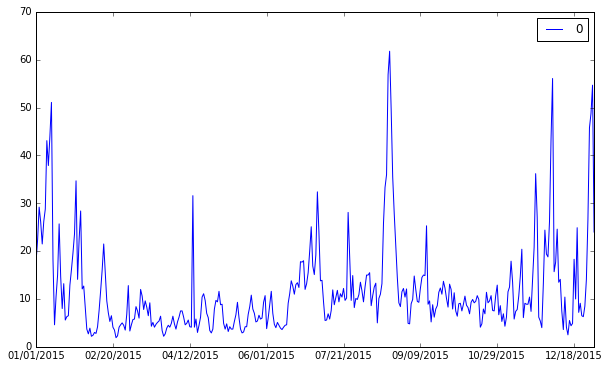

In [288]:
# plot the data

#df = daily_mean(df)
cdf.plot()
print(type(cdf))

## Task 2.4. Plot a moving average

Plot a moving average of the PM2.5 Air Quality Index data. Experiment with different windows and see which one is reasonable for a seasonal interpretation. Write a warning to Asthma sufferers in Salt Lake City on which seasons the Air Quality Index is likely to be bad.

Recall that some dates have missing values, so to average over intervals, you'll have to 'fill in' the missing values in a sensible way. 

Hints: 
 * You'll find two values for each day, decide on how to handle that and implement it.
 * You'll have to handle missing data - remember the [`.fillna()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html) function, which will be helpful here.  
 * Use [`rolling()`](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.rolling_mean.html) function as in Lab 6 to calcualte the rolling mean.


               0    20d
01/01/2015  17.8  23.40
01/02/2015  22.4  23.40
01/03/2015  29.2  23.40
01/04/2015  26.1  25.08
01/05/2015  21.5  26.36
01/06/2015  26.2  29.14
01/07/2015  28.8  31.50
01/08/2015  43.1  36.02
01/09/2015  37.9  41.00
01/10/2015  44.1  38.88
01/11/2015  51.1  31.18
01/12/2015  18.2  25.70
01/13/2015   4.6  19.88
01/14/2015  10.5  14.80
01/15/2015  15.0  14.10
01/16/2015  25.7  14.78
01/17/2015  14.7  15.32
01/18/2015   8.0  13.44
01/19/2015  13.2   9.56
01/20/2015   5.6   7.92
01/21/2015   6.3   8.90
01/22/2015   6.5   9.48
01/23/2015  12.9  12.28
01/24/2015  16.1  15.74
01/25/2015  19.6  21.38
01/26/2015  23.6  21.62
01/27/2015  34.7  22.88
01/28/2015  14.1  24.64
01/29/2015  22.4  22.34
01/30/2015  28.4  17.94
...          ...    ...
12/02/2015  26.2  32.78
12/03/2015  43.4  32.04
12/04/2015  56.1  31.82
12/05/2015  15.7  31.50
12/06/2015  17.7  25.52
12/07/2015  24.6  17.12
12/08/2015  13.5  15.48
12/09/2015  14.1  12.66
12/10/2015   7.5   9.82
12/11/2015   3.6

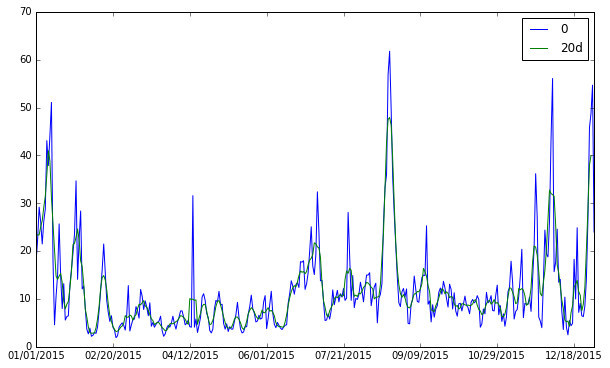

In [318]:
cdf["20d"] = np.round(cdf[0].rolling(window = 5, center = True).mean(), 2)
cdf.fillna(value=None, method='backfill', axis=None, inplace=True, limit=None, downcast=None)

print(cdf)
cdf.plot()

**Your Warning:**